In [4]:
from function import *

In [47]:
# Paramètres de l'extraction
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY
start_date = '1 Jan, 2023'
end_date = '31 Dec, 2024'

# Extraire les données
df = get_historical_data(symbol, interval, start_date, end_date)

# Sauvegarder les données dans un fichier CSV
output_file = "BTCUSDT_daily_2023.csv"
df.to_csv(output_file, index=False)
print(f"Données sauvegardées dans {output_file}")

Données sauvegardées dans BTCUSDT_daily_2023.csv


In [48]:
# Charger les données depuis le fichier CSV
data_file = "BTCUSDT_daily_2023.csv"
df = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérifier les données
print(df.head())
print(df.info())

   timestamp      open      high       low     close        volume  \
0 2023-01-01  16541.77  16628.00  16499.01  16616.75   96925.41374   
1 2023-01-02  16617.17  16799.23  16548.70  16672.87  121888.57191   
2 2023-01-03  16672.78  16778.40  16605.28  16675.18  159541.53733   
3 2023-01-04  16675.65  16991.87  16652.66  16850.36  220362.18862   
4 2023-01-05  16850.36  16879.82  16753.00  16831.85  163473.56641   

      close_time  quote_asset_volume  number_of_trades  \
0  1672617599999        1.604794e+09           3218355   
1  1672703999999        2.034683e+09           4036118   
2  1672790399999        2.662766e+09           5097596   
3  1672876799999        3.709833e+09           6310703   
4  1672963199999        2.751080e+09           4842014   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  
0                  48548.78168                  8.038417e+08       0  
1                  60925.25948                  1.017075e+09       0  
2                

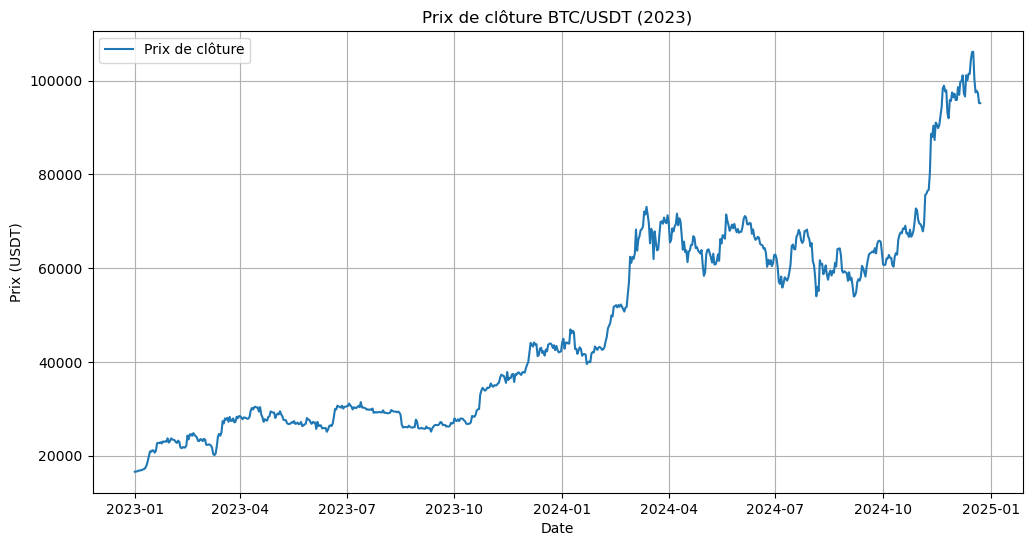

In [7]:
# Graphique simple des prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Prix de clôture')
plt.title("Prix de clôture BTC/USDT (2023)")
plt.xlabel("Date")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid()
plt.show()

In [8]:
# Checking for any missing (NaN) values in the dataset.
df.isna().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

In [9]:
final_data = add_indicators(df)
final_data

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,RSI,EMA,ATR
0,2023-01-14,19930.01,21258.00,19888.05,20954.92,393913.74951,1673740799999,8.183072e+09,8659545,197817.55209,4.109568e+09,0,99.633998,18092.438235,495.185000
1,2023-01-15,20952.76,21050.74,20551.01,20871.50,178542.22549,1673827199999,3.710527e+09,5194354,88310.83908,1.835437e+09,0,97.301269,18462.979804,495.509643
2,2023-01-16,20872.99,21474.05,20611.48,21185.65,293078.08262,1673913599999,6.168654e+09,6856434,145352.66942,3.059597e+09,0,97.535299,18826.002497,521.728240
3,2023-01-17,21185.65,21647.45,20841.31,21134.81,275407.74409,1673999999999,5.840586e+09,6440138,137121.64311,2.908227e+09,0,96.083143,19133.843497,542.043366
4,2023-01-18,21132.29,21650.00,20407.15,20677.47,350916.01949,1674086399999,7.399719e+09,7617173,173174.41690,3.652038e+09,0,83.971533,19339.660364,592.100982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2024-12-19,100204.01,102800.11,95700.00,97461.86,55147.39800,1734652799999,5.487547e+09,7273941,26898.63715,2.677636e+09,0,49.458091,100575.350435,4338.364509
706,2024-12-20,97461.86,98233.00,92232.54,97805.44,62884.13570,1734739199999,6.022845e+09,7429007,29463.23021,2.822939e+09,0,50.116049,100206.029044,4457.085616
707,2024-12-21,97805.44,99540.61,96398.39,97291.99,23483.54143,1734825599999,2.296232e+09,3717638,11726.94119,1.146732e+09,0,49.087622,99817.490505,4363.166643
708,2024-12-22,97292.00,97448.08,94250.35,95186.27,19353.83036,1734911999999,1.857820e+09,3633551,9293.39749,8.920819e+08,0,45.008400,99199.994438,4279.921169


In [10]:
scaled_data = scaling_data(final_data)
scaled_data

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,RSI,EMA,ATR
0,2023-01-14,0.004289,0.019244,0.003817,0.015831,0.563139,0.000000,0.468028,0.567978,0.562288,0.467339,0.0,1.000000,0.000000,0.000000
1,2023-01-15,0.015806,0.016910,0.011282,0.014891,0.255108,0.001410,0.211703,0.339912,0.250880,0.208192,0.0,0.971200,0.004459,0.000082
2,2023-01-16,0.014908,0.021677,0.011963,0.018429,0.418921,0.002821,0.352580,0.449304,0.413092,0.347690,0.0,0.974090,0.008828,0.006700
3,2023-01-17,0.018429,0.023629,0.014551,0.017856,0.393648,0.004231,0.333778,0.421905,0.389685,0.330441,0.0,0.956161,0.012533,0.011827
4,2023-01-18,0.017828,0.023658,0.009662,0.012706,0.501643,0.005642,0.423133,0.499373,0.492209,0.415201,0.0,0.806633,0.015010,0.024462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2024-12-19,0.908236,0.937470,0.857518,0.877357,0.078625,0.994358,0.313545,0.476783,0.076240,0.304164,0.0,0.380533,0.992661,0.970034
706,2024-12-20,0.877357,0.886041,0.818471,0.881226,0.089690,0.995769,0.344224,0.486989,0.083533,0.320722,0.0,0.388656,0.988216,1.000000
707,2024-12-21,0.881226,0.900766,0.865382,0.875445,0.033338,0.997179,0.130649,0.242720,0.033096,0.129711,0.0,0.375959,0.983540,0.976294
708,2024-12-22,0.875445,0.877202,0.841193,0.851733,0.027431,0.998590,0.105523,0.237185,0.026175,0.100693,0.0,0.325597,0.976109,0.955283


In [11]:
# Setting up parameters for a prediction model. Here, the goal is to predict the closing price 60 days in the future using the closing price as the regressor.
prediction_time = 60 # We want to predict the close price 60 days Later 
regressor = ['close'] # We choose One regressor which is the colse price itself
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

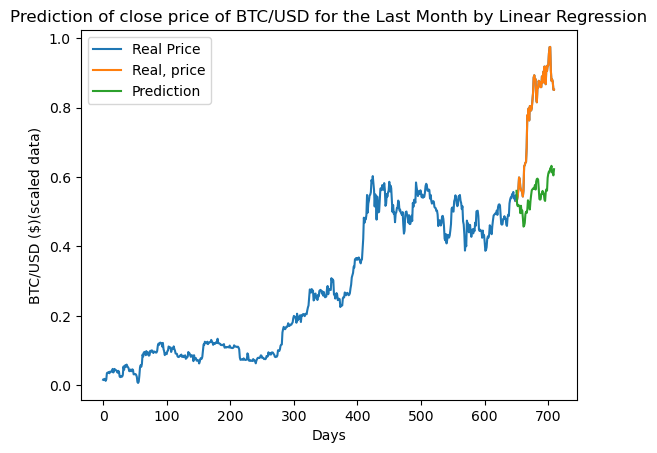

In [12]:
# Applying linear regression to the preprocessed data.
regression_matrix, future_price, simple_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)
# Visualizing the model's performance.
visualize_model(regression_matrix, scaled_data)

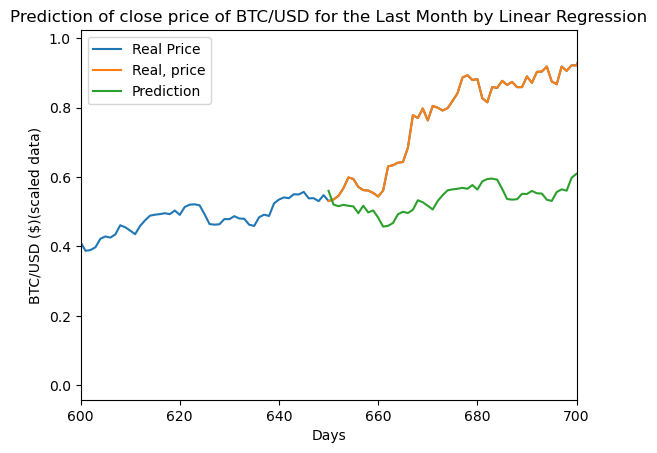

In [13]:
visualize_model(regression_matrix, scaled_data, zoom = [600, 700])

In [14]:
# Displaying the R-squared value of the linear regression model.
simple_r2

0.7366993717968787

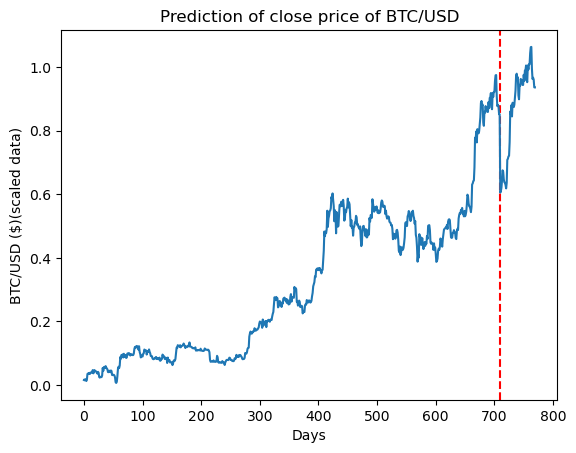

In [15]:
# Visualizing future price predictions made by the model.
visualize_future(scaled_data, future_price)

<function matplotlib.pyplot.show(close=None, block=None)>

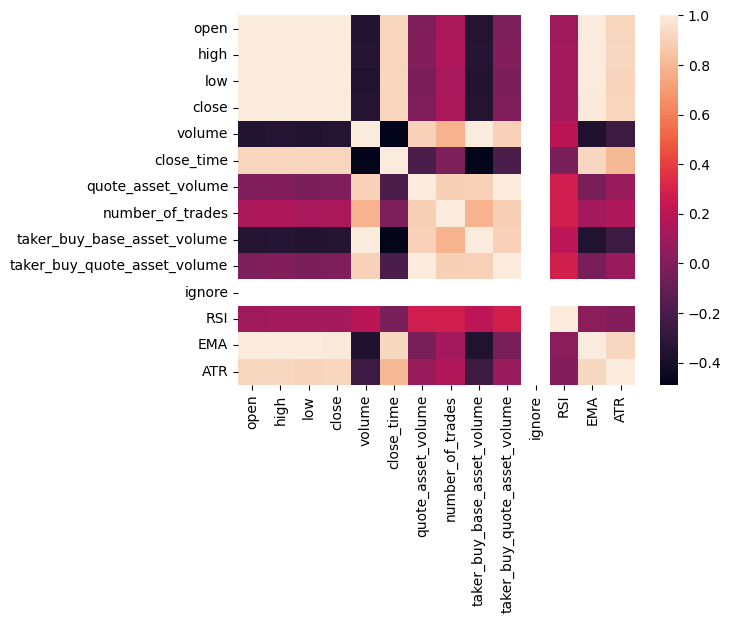

In [16]:
# Creating a correlation matrix from the final_data.
corr_matrix = final_data.drop('timestamp', axis=1).corr()
# A heatmap is then plotted using seaborn to visually represent the correlations.
sns.heatmap(corr_matrix)
plt.show

In [17]:
# Extracting the correlation values of all features with respect to the 'close' column from the correlation matrix.
corr_matrix['close']

open                            0.997833
high                            0.999234
low                             0.998875
close                           1.000000
volume                         -0.348466
close_time                      0.915207
quote_asset_volume             -0.008828
number_of_trades                0.141153
taker_buy_base_asset_volume    -0.345395
taker_buy_quote_asset_volume   -0.008611
ignore                               NaN
RSI                             0.117945
EMA                             0.993859
ATR                             0.914227
Name: close, dtype: float64

In [18]:
# Updating the list of regressors to include 'close', 'ATR', and 'EMA' for the data preprocessing step.
regressor = ['close', 'ATR', 'EMA']
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

In [19]:
# Applying linear regression with the updated set of regressors.
regression_matrix, future_price, mult_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

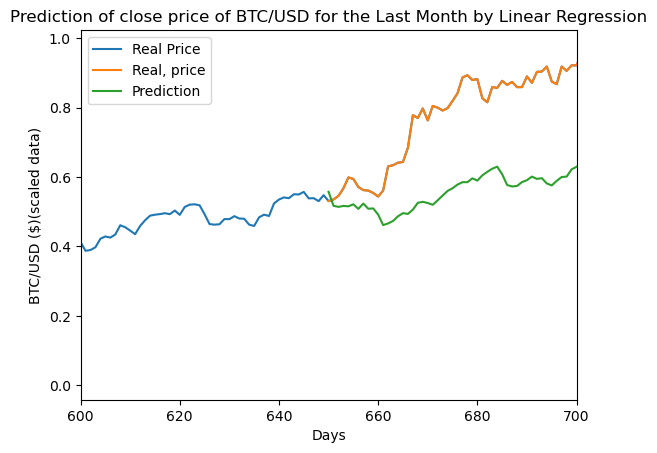

In [20]:
# Visualizing the performance of the linear regression model.
visualize_model(regression_matrix, scaled_data, zoom=[600,700])

In [21]:
# Displaying the R-squared values for both the multivariate model ('mult_r2') and the previous simple model ('simple_r2').
mult_r2, simple_r2

(0.7524116278515773, 0.7366993717968787)

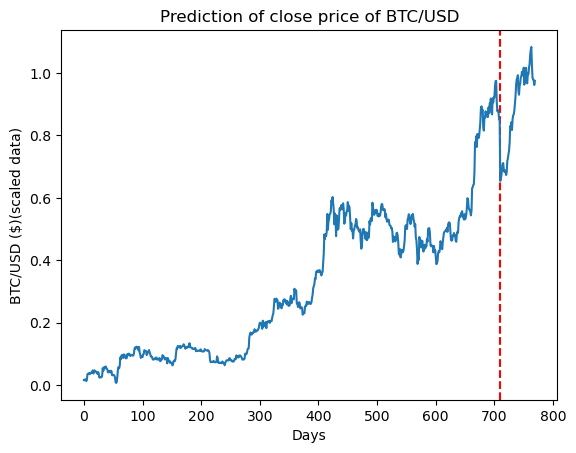

In [22]:
visualize_future(scaled_data, future_price)

In [23]:
# Creating a parameter grid for hyperparameter tuning. This grid includes a range of values for 'C' and 'gamma', which are parameters used in models like SVMs.
param_grid = {'C': [10**i for i in range(2, 11)], 
              'gamma' : [10**(-i) for i in range(2, 11)]} # Creat a dictionnary of parameters

In [24]:
# Splitting the price and target data into training and test sets, with 70% of data as training set.
price_train, _, target_train, _ = train_test_split(price, target, test_size = 0.3)
# The 'cross_validation_parameter' function is then used to find the best 'C' and 'gamma' values for a model, likely through a grid search approach.
best_C, best_gamma = cross_validation_parameter(param_grid, price_train, target_train)

In [25]:
print(f'The best values are {best_C} for C and {best_gamma} for Gamma')

The best values are 100000 for C and 0.01 for Gamma


In [26]:
# Applying a Support Vector Regression (SVR) model with the best 'C' and 'gamma' values found. 
svr_matrix, future_price, accuracy_score = apply_svr(scaled_data, prediction_time, price, target, regressor, best_C, best_gamma)

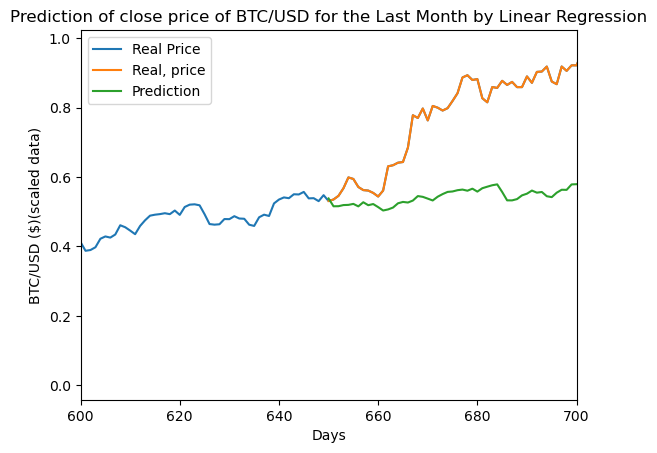

In [27]:
# Visualizing the SVR model's performance.
visualize_model(svr_matrix, scaled_data, zoom = [600, 700])

In [28]:
# Displaying the accuracy score of the SVR model.
accuracy_score

0.7884325246762908

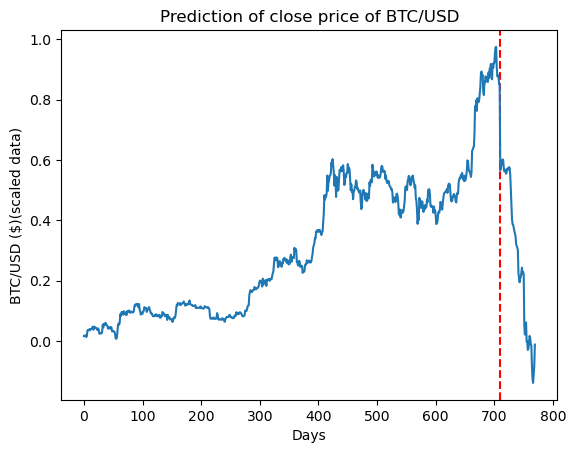

In [29]:
visualize_future(scaled_data, future_price)

In [30]:
# Setting the sequence length for time series prediction.
sequence_length = 20 

In [31]:
# Creating sequences from the scaled data using the specified sequence length.
X, y = create_sequences(scaled_data, sequence_length) # Prediction based on 20 periods (20 days or 20 hours) 
# The 'lstm_model' function trains the LSTM on these sequences and makes predictions.
y_train, y_test, predicted_values = lstm_model(X, y)

Epoch 1/100


2024-12-23 00:09:59.109476: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0686
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0346 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0107 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0095 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0138 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0081 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0042 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0047 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0057 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0055 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0036 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0021 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0022 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0030 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0028
Epoch 16/100
2/2 ━

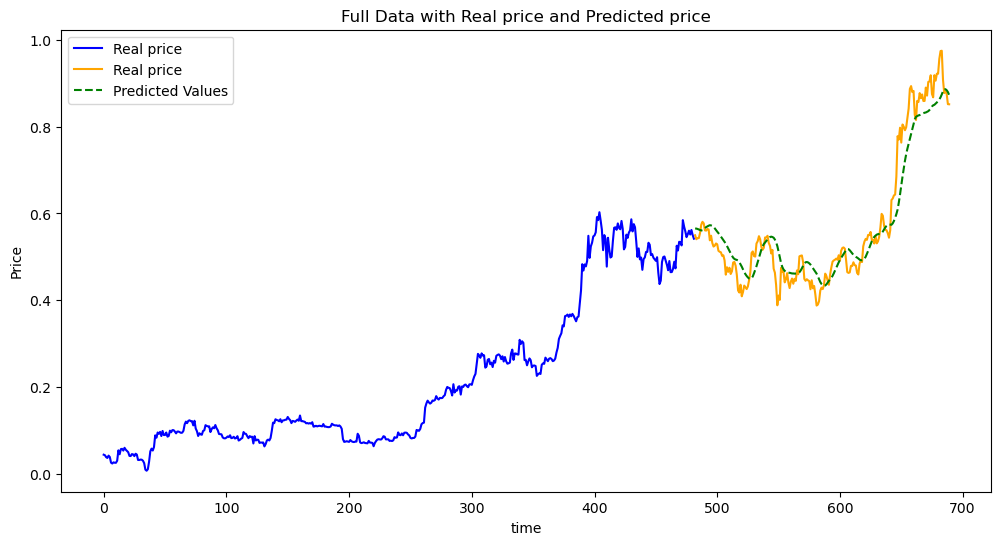

In [32]:
visualize_RNN_prediction(y_train, y_test, predicted_values)

In [45]:
# Paramètres de l'extraction
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR
start_date = '1 Jan, 2023'
end_date = '31 Dec, 2024'

# Extraire les données
df = get_historical_data(symbol, interval, start_date, end_date)

# Sauvegarder les données dans un fichier CSV
output_file = "BTCUSDT_hourly_2023.csv"
df.to_csv(output_file, index=False)
print(f"Données sauvegardées dans {output_file}")

# Charger les données depuis le fichier CSV
data_file = "BTCUSDT_hourly_2023.csv"
df = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérifier les données
print(df.head())
print(df.info())

Données sauvegardées dans BTCUSDT_hourly_2023.csv
            timestamp      open      high       low     close      volume  \
0 2023-01-01 00:00:00  16541.77  16545.70  16508.39  16529.67  4364.83570   
1 2023-01-01 01:00:00  16529.59  16556.80  16525.78  16551.47  3590.06669   
2 2023-01-01 02:00:00  16551.47  16559.77  16538.14  16548.19  3318.84038   
3 2023-01-01 03:00:00  16548.19  16548.19  16518.21  16533.04  4242.08050   
4 2023-01-01 04:00:00  16533.04  16535.97  16511.92  16521.85  4285.00909   

      close_time  quote_asset_volume  number_of_trades  \
0  1672534799999        7.214629e+07            149854   
1  1672538399999        5.937676e+07            126556   
2  1672541999999        5.491945e+07            115398   
3  1672545599999        7.012254e+07            137724   
4  1672549199999        7.080264e+07            129535   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  
0                   2179.94772                  3.603235e+07       

In [41]:
data_file = "BTCUSDT_hourly_2023.csv"
hour_data = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
hour_data['timestamp'] = pd.to_datetime(hour_data['timestamp']) 
hour_btc = scaling_data(hour_data)

Epoch 1/100


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0392
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0044
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0021
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0013
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 9.1996e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 8.3768e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 7.5634e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 7.4176e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 7.0805e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 6.4563e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 6.3586e-04
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 6.0969e-04
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 5.8502e-04
Epoch 15/100
18/18 ━━━━━━━━━━━━━━

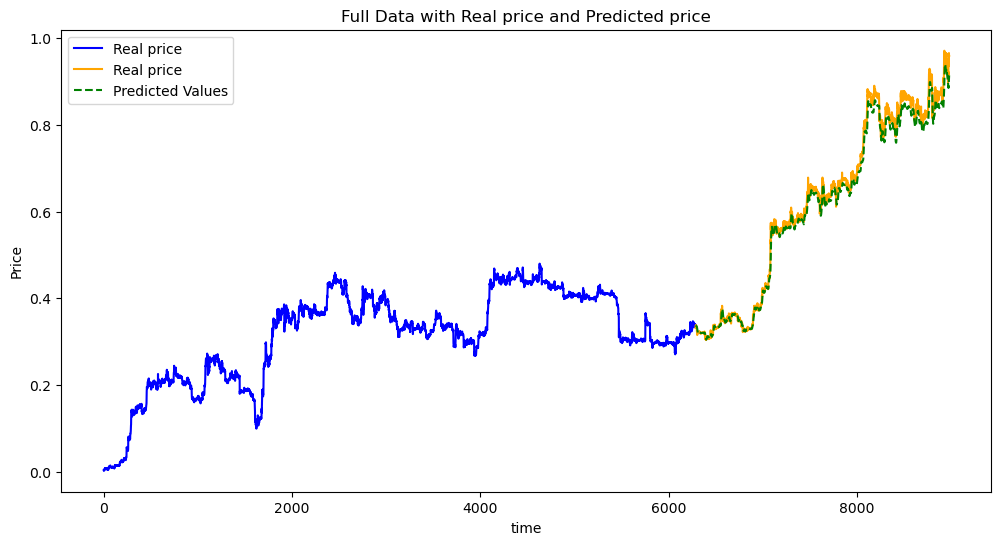

In [42]:
# Setting the sequence length for LSTM model, creating sequences from the hourly data, and applying the LSTM model to this data.
sequence_length = 20
X, y = create_sequences(hour_btc, sequence_length) # Prediction based on 20 hours 
y_train, y_test, predicted_values = lstm_model(X, y)
visualize_RNN_prediction(y_train, y_test, predicted_values)

In [35]:
# Implementing a recursive prediction method.
t = 5
prediction = recursive_prediction(X, y, t)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0629
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0053
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0022
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0019
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0017
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0015
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0014
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0013
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0012
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0011
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0010
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0010
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 8.9988e-04
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 9.2292e-04
Epoch 15/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/s

In [36]:
prediction = inverse_scalling(prediction, hour_data)

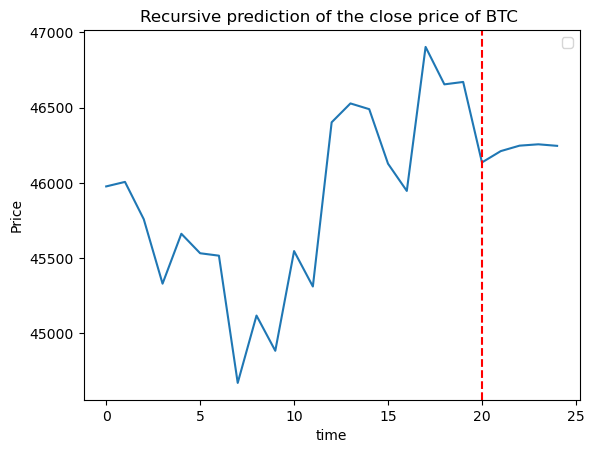

In [37]:
# Plotting the results of the recursive prediction.
# The red dashed line at 'sequence_length' indicates the point in the time series where the recursive prediction begins.
plt.plot(prediction)
plt.title('Recursive prediction of the close price of BTC ')
plt.axvline(x = sequence_length, color = 'r', linestyle = '--')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend('')
plt.show()

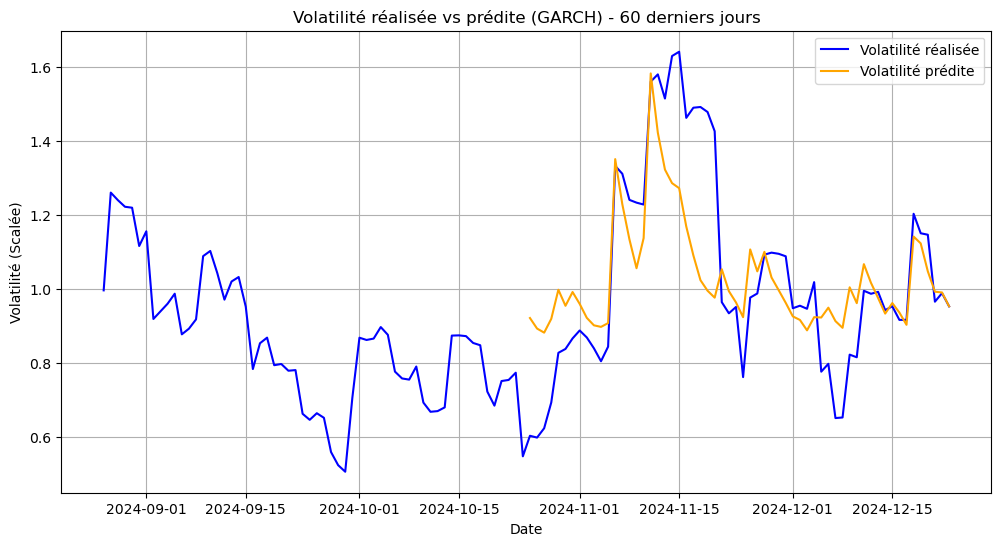

Évaluation des prédictions de volatilité :
Mean Squared Error (MSE): 0.0336
Root Mean Squared Error (RMSE): 0.1832
Mean Absolute Error (MAE): 0.1341
R² Score: 0.5493


In [56]:
# Charger les données
data_d = pd.read_csv('BTCUSDT_daily_2023.csv')  # Remplacez par votre fichier
data_d['timestamp'] = pd.to_datetime(data_d['timestamp'])
data_d.set_index('timestamp', inplace=True)

garch_analysis(data_d,1,1)

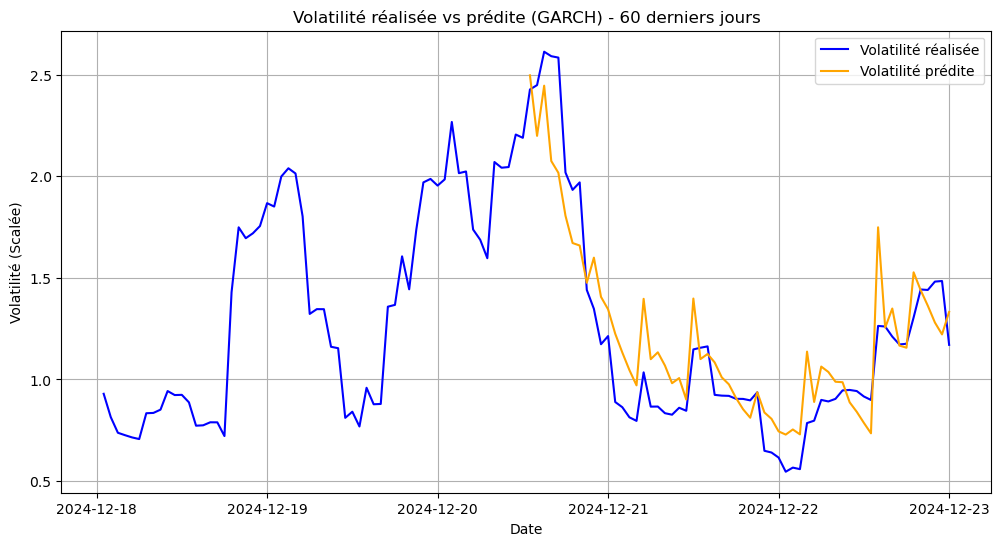

Évaluation des prédictions de volatilité :
Mean Squared Error (MSE): 0.0441
Root Mean Squared Error (RMSE): 0.2101
Mean Absolute Error (MAE): 0.1702
R² Score: 0.8353


In [46]:
# Charger les données
data_h = pd.read_csv('BTCUSDT_hourly_2023.csv')
data_h['timestamp'] = pd.to_datetime(data_h['timestamp'])
data_h.set_index('timestamp', inplace=True)

garch_analysis(data_h,2,2,'t')